## logistic Regression
Anshurup gupta 2301Ai02

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [22]:
err = 1.0e-9

def binary_cross_entropy_loss(Y_true, Y_pred):
    BCE = np.sum(Y_true * np.log(Y_pred + err) + (1 - Y_true) * np.log(1 - Y_pred + err))
    return -BCE / len(Y_true)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [23]:

def normalize_features(df):
    df["Gender"] = np.where(df["Gender"] == "Female", 0, 1)
    for column in df.columns: 
        df[column] = df[column]  / df[column].abs().max()

    #print(df)
    return df

def fit_logistic_regression(X, y, learning_rate, num_epochs):
    num_data = len(X)

    w = np.random.rand(X.shape[1]) * learning_rate
    b = np.random.rand(1) * learning_rate

    #print(w)
    #print(b)

    for epoch in range(num_epochs):
        y_pred = predict(X, w, b)
        print(f"{epoch} loss: {binary_cross_entropy_loss(y, y_pred)}")

        del_Err = y_pred - y
        #print(del_Err)
        
        del_W = np.dot(X.transpose(), del_Err).transpose() / num_data
        #print(del_W)

        del_B = del_Err.sum() / num_data
        #print(del_B)

        w = w - learning_rate * del_W
        b = b - learning_rate * del_B
        #print(w)
        #print(b)

    return w, b

def predict(X, weights, bias, threshold=0.5):
    y_val = sigmoid(X @ weights + bias)
    return np.where((y_val > threshold), 1, 0)
        


In [24]:

def evaluate_metrics(y_true, y_pred):
    print("Accuracy: ",accuracy_score(y_true,y_pred))
    print("Precision: ",precision_score(y_true,y_pred))

    print("Recall: ",recall_score(y_true,y_pred))
    print("F1 Score: ",f1_score(y_true,y_pred))
    print(confusion_matrix(y_true,y_pred))

def plot_roc_curve(Y_true, Y_scores):
    fpr, tpr, t = roc_curve(Y_true, Y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')

    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    matrix_val = confusion_matrix(y_true, y_pred)
    plt.matshow(matrix_val, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

    for i in range(matrix_val.shape[0]):
        for j in range(matrix_val.shape[1]):
            plt.text(j, i, format(matrix_val[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if matrix_val[i, j] > 0.5 else "black")

    plt.show()


### Main Body

0 loss: 14.387867423631365
1 loss: 6.276189081349486
2 loss: 9.295864960593107
3 loss: 6.335398412315047
4 loss: 10.006376932179839
5 loss: 6.335398412315047
6 loss: 4.6775371452793335
7 loss: 3.6117691878992324
8 loss: 9.236655629627544
9 loss: 6.335398412315047
Accuracy:  0.34
Precision:  0.5555555555555556
Recall:  0.4166666666666667
F1 Score:  0.47619047619047616
[[ 2 12]
 [21 15]]


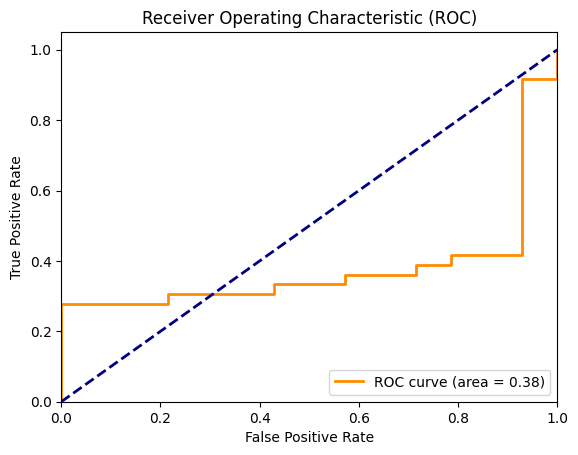

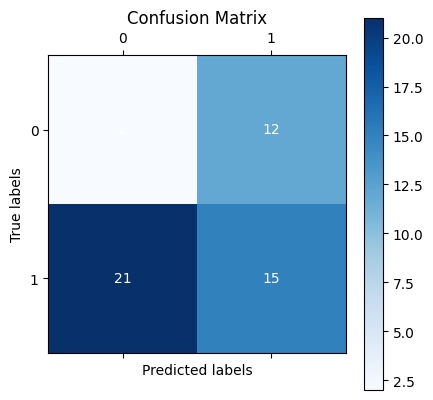

In [25]:
def main():
    data_train = pd.read_csv('train.csv')
    data_test = pd.read_csv('test.csv')
    
    # Normalize the features and handle categorical data
    data_train = normalize_features(data_train)
    data_test = normalize_features(data_test)
    
    # Extract features and labels
    X_train = data_train[['Gender', 'Age', 'EstimatedSalary']].values
    y_train = data_train['Purchased'].values
    X_test = data_test[['Gender', 'Age', 'EstimatedSalary']].values
    y_test = data_test['Purchased'].values

    # Train logistic regression model
    learning_rate = 0.1
    num_epochs = 10
    weights, bias = fit_logistic_regression(X_train, y_train, learning_rate, num_epochs)

    # Make predictions on the test set
    y_pred_test = predict(X_test, weights, bias)
    
    # Calculate and print evaluation metrics
    evaluate_metrics(y_test, y_pred_test)
    
    # Generate and plot ROC curve
    y_scores = sigmoid(np.dot(X_test, weights) + bias)  # Calculate probabilities for ROC
    plot_roc_curve(y_test, y_scores)
    
    # Generate and plot confusion matrix
    plot_confusion_matrix(y_test, y_pred_test)

# Run the main function
if __name__ == "__main__":
    main()